<a href="https://colab.research.google.com/github/Noorvh/Thesis_Sign-Language-Translator/blob/main/MediaPipe_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.10.12


In [4]:
!pip install opencv-python
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.8/34.8 MB 29.4 MB/s eta 0:00:00


In [5]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [6]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic     #There are many different models you can use, like just face, hand or pose detections!

In [12]:
from google.colab import drive
drive.mount('/content/drive')
image_path = 'drive/My Drive/Thesis/Data/Test/GlossVideos/DOOF-A/1/frame2.jpg'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


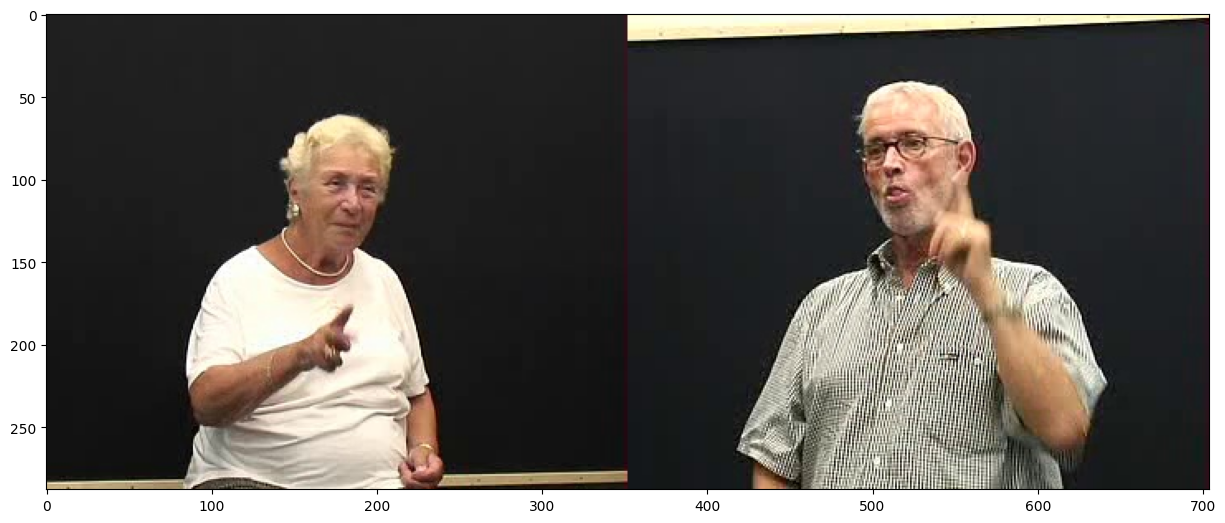

In [13]:
img = cv2.imread(image_path)
plt.figure(figsize=(15,10))
plt.imshow(img[...,::-1]);

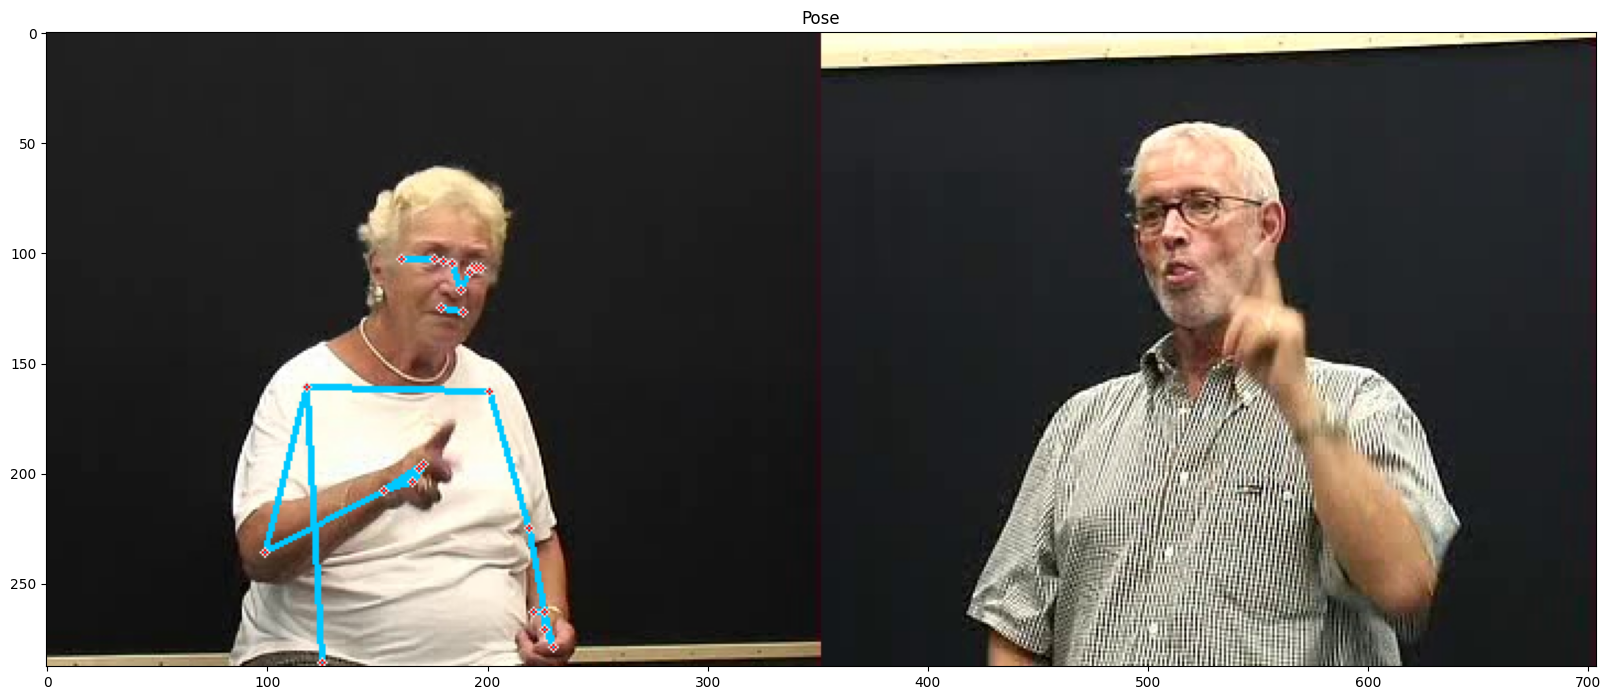

In [14]:
# Initialize MP pose.
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(static_image_mode=True,
                    model_complexity=2,
                    enable_segmentation=True,
                    min_detection_confidence=0.5)
# Convert to RGB.
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Process.
results = pose.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

annotated_img = img.copy()

# Draw pose landmarks on the image.
mp_drawing.draw_landmarks(annotated_img,
                          results.pose_landmarks,
                          mp_pose.POSE_CONNECTIONS,
                          # Keep default style or write your own.
                          # landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
                          landmark_drawing_spec=mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=1),
                          connection_drawing_spec=mp_drawing.DrawingSpec(color=(255, 200, 0), thickness=2, circle_radius=2))
# Display.
plt.figure(figsize=(20,15))
plt.imshow(annotated_img[...,::-1])
plt.title('Pose');